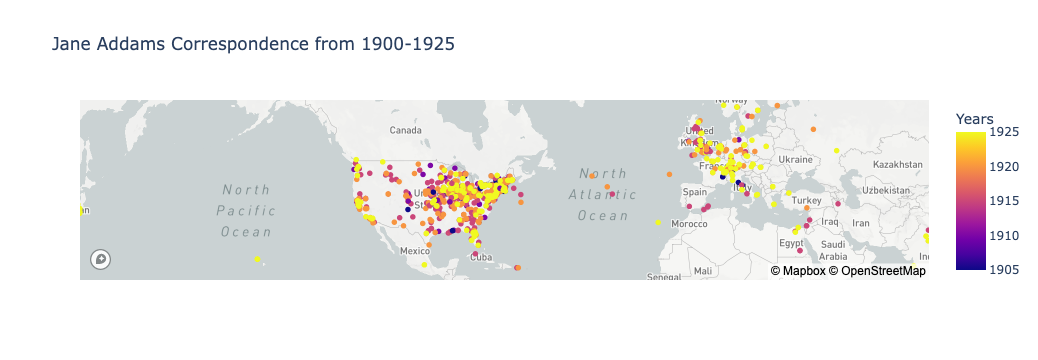

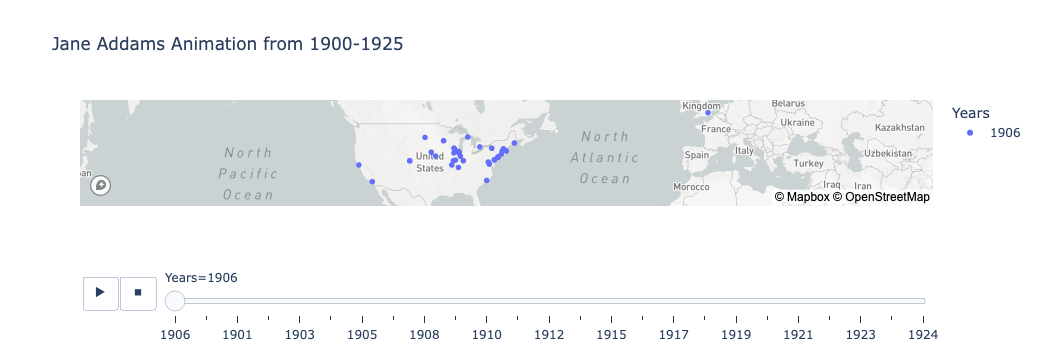

In [3]:
"""
JAPP.ipynb
Author: Olivia Luisi
This file is for testing. Its completely cleaned
for grading and unused code is moved to leftovers.py
for browsing on my process.
"""
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px

# This is my personal MapBox token, it should work on your computer!
px.set_mapbox_access_token("pk.eyJ1Ijoib2x1aXNpIiwiYSI6ImNsb2VsMG94eTA3eGUyanFydmR6c3c2MW0ifQ.koiidwyYe2AIYGWn1UxJrA")


def add_year(df):
    """
    This function cleans and creates a year dataset from a given df.
    I needed this as the database I pulled the geojson file from
    used hmtl style date data. I had to take the line of html
    and clean it into a year. Thankfully the title has
    a full date in it for the viewer of the map.
    """
    new_df = df.copy()
    result = []
    for index, row in new_df.iterrows():
        value = str(row['date'])
        first = value.split(">")
        second = first[1].split("-")
        third = second[0]
        third = third.replace("</a", "")
        # Special case for the two dates input incorrectly
        if len(third) == 5:
            third = third.replace("0", "")
        elif len(third) > 4:
            third = third.split(" ")
            third = third[2]
        third = str(third)
        result.append(third)
    return result


def count_per_years(df):
    """
    This function takes in the dataframe and sorts each row into
    groups based on each half decade it belongs to. For items before
    1900 or after 1925. I personally made this choice because
    as a transcriber for the project, I know that 1925+ isn't finished
    being entered yet.
    """
    new_df = df.copy()
    results = []
    for index, row in new_df.iterrows():
        if int(row['year']) >= 1900 and int(row['year']) <= 1905:
            results.append(1905)
        elif int(row['year']) >= 1906 and int(row['year']) <= 1910:
            results.append(1910)
        elif int(row['year']) >= 1911 and int(row['year']) <= 1915:
            results.append(1915)
        elif int(row['year']) >= 1916 and int(row['year']) <= 1920:
            results.append(1920)
        elif int(row['year']) >= 1921 and int(row['year']) <= 1924:
            results.append(1925)
        elif int(row['year']) >= 1925 and int(row['year']) <= 1930:
            results.append(np.NaN)
        else:
            results.append(np.NaN)
    return results


def ani_mapping(df):
    """
    This function creates the animated map shown below.
    It utilizes the information displayed in the title.
    """
    fig = px.scatter_mapbox(df, lat=df.geometry.y, lon=df.geometry.x,
                            color="year", hover_name="title",
                            animation_group="title", animation_frame="year",
                            title="Jane Addams Animation from 1900-1925",
                            zoom=1, labels={"year": "Years"})
    fig.show()


def text_mapping(df):
    """
    This function creates the combined map shown below.
    It utilizes the information displayed in the title.
    """
    fig = px.scatter_mapbox(df, lat=df.geometry.y, lon=df.geometry.x,
                            color="group", hover_name="title",
                            title="Jane Addams Correspondence from 1900-1925",
                            zoom=1, labels={"group": "Years"})
    fig.show()


# Reading in full DF
JAPP_df = gpd.read_file("JAPP.json")
JAPP_df.head(5)

# Seperating DFs into itemTypes
# This is how I chose what to focus on.
people_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Person']
org_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Organization']
nonyear_text_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Text']

# Add 'year' column cleaned from the href string from 'date' column
nonyear_text_JAPP = nonyear_text_JAPP.dropna()
text_JAPP = nonyear_text_JAPP.copy()
text_JAPP['year'] = add_year(nonyear_text_JAPP)

# Seperate year groups into a group index
text_JAPP['group'] = count_per_years(text_JAPP)

text_JAPP = text_JAPP.dropna()
text_mapping(text_JAPP)
ani_mapping(text_JAPP)
